In [2]:
import os
import numpy as np
import pandas as pd
import xarray as xr
from datetime import datetime
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from netCDF4 import Dataset  

In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /global/AWIsoft/intel-python/2020.2.902/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases

In [3]:
data_path = '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR'

In [4]:
files = glob(data_path+'/*/*_RAMSES_trans_irrad.csv', recursive = True)

In [5]:
files

['/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2019R9_data/2019R9_300025060015720_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R15_data/2020R15_100000000000040_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R11_data/2020R11_300025060613750_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R14_data/2020R14_100000000000030_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R10_data/2020R10_300025060612750_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R21_data/2020R21_300025060613750_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2019R8_data/2019R8_300025060111910_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R12_data/2020R12_300025060614630_RAMSES_trans_irrad.csv',
 '/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP

In [6]:
files = sorted(files)

In [7]:
for i in np.arange(0,len(files)):
    print(files[i])
    globals()[f"df{i}"] = pd.read_csv(files[i], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
    #df = pd.read_csv(files[i], index_col = 'Date/Time')

/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2019R8_data/2019R8_300025060111910_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2019R9_data/2019R9_300025060015720_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R10_data/2020R10_300025060612750_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R11_data/2020R11_300025060613750_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R12_data/2020R12_300025060614630_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R13_data/2020R13_100000000000020_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R14_data/2020R14_100000000000030_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R15_data/2020R15_100000000000040_RAMSES_trans_irrad.csv
/home/ollie/loziel/nuarctic_temp/nuarctic/data/ITP_PAR/2020R21_data/2020R21_30002506

In [8]:
df0 = pd.read_csv(files[0], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df1 = pd.read_csv(files[1], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df2 = pd.read_csv(files[2], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df3 = pd.read_csv(files[3], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df4 = pd.read_csv(files[4], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df5 = pd.read_csv(files[5], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df6 = pd.read_csv(files[6], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df7 = pd.read_csv(files[7], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)
df8 = pd.read_csv(files[8], index_col = 'Date/Time', parse_dates=['Date/Time'], header=0)

In [9]:
df4

,Latitude (deg),Longitude (deg),broadband irradiance downward (W/m**2),photosythetically active (PAR) irradiance downward (W/m**2),absolute PAR irradiance downward (micro mol/m**2/s),filter_flag_sun (),irradiance downward at 320 (mW/m**2/nm),irradiance downward at 321 (mW/m**2/nm),irradiance downward at 322 (mW/m**2/nm),irradiance downward at 323 (mW/m**2/nm),...,irradiance downward at 941 (mW/m**2/nm),irradiance downward at 942 (mW/m**2/nm),irradiance downward at 943 (mW/m**2/nm),irradiance downward at 944 (mW/m**2/nm),irradiance downward at 945 (mW/m**2/nm),irradiance downward at 946 (mW/m**2/nm),irradiance downward at 947 (mW/m**2/nm),irradiance downward at 948 (mW/m**2/nm),irradiance downward at 949 (mW/m**2/nm),irradiance downward at 950 (mW/m**2/nm)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2020-04-24 14:06:34,83.926,14.7594,1.6051,1.4563,6.1764,0,0.3439,0.3747,0.4098,0.4516,...,0.0321,0.0375,0.0291,0.0207,0.0123,0.0182,0.0285,0.0387,0.0445,0.0459
2020-04-24 15:02:09,83.926,14.7594,1.4641,1.3282,5.6327,0,0.3089,0.3360,0.3670,0.4039,...,0.0387,0.0477,0.0446,0.0416,0.0385,0.0370,0.0360,0.0351,0.0354,0.0371
2020-04-24 16:02:10,83.926,14.7594,1.2969,1.1769,4.9912,0,0.2662,0.2908,0.3183,0.3503,...,0.0312,0.0324,0.0313,0.0301,0.0290,0.0266,0.0239,0.0212,0.0251,0.0358
2020-04-24 17:02:10,83.925,14.7547,1.1269,1.0232,4.3386,0,0.2210,0.2415,0.2652,0.2941,...,0.0237,0.0275,0.0293,0.0311,0.0328,0.0306,0.0271,0.0237,0.0273,0.0381
2020-04-24 18:02:09,83.925,14.7547,0.9565,0.8680,3.6789,0,0.1850,0.2044,0.2245,0.2457,...,0.0272,0.0335,0.0324,0.0313,0.0302,0.0310,0.0322,0.0335,0.0367,0.0417
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-07 08:02:04,83.145,7.5307,3.7795,3.6517,16.3221,0,0.1734,0.1705,0.1678,0.1657,...,0.0579,0.0630,0.0735,0.0840,0.0944,0.0846,0.0688,0.0529,0.0479,0.0537
2020-08-07 09:02:01,83.144,7.5360,12.9929,12.6342,56.4435,0,0.6685,0.6676,0.6724,0.6862,...,0.1366,0.1028,0.1039,0.1050,0.1061,0.1532,0.2142,0.2752,0.3018,0.2943
2020-08-07 10:02:06,83.144,7.5360,22.7110,21.9672,96.2790,0,1.6113,1.6290,1.6480,1.6690,...,0.3683,0.3679,0.3140,0.2601,0.2062,0.2617,0.3500,0.4382,0.5073,0.5574


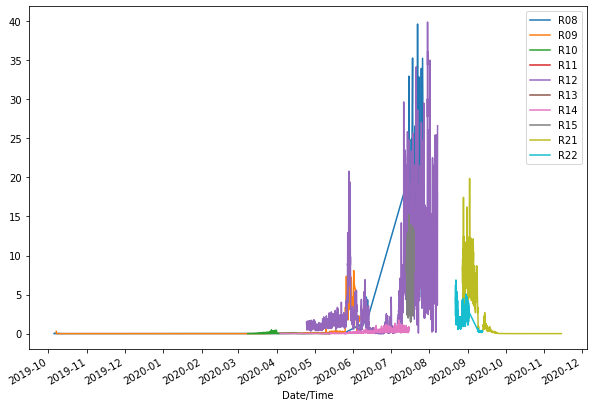

In [10]:
#%matplotlib widget

fig = plt.figure(figsize=(10, 7))
ax0 = df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R08', color = 'C0')
ax1 = df1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'C1')
ax2 = df2['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C2')
ax3 = df3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R11', color = 'C3')
ax4 = df4['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C4')
ax5 = df5['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R13', color = 'C5')
ax6 = df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C6')
ax7 = df7['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R15', color = 'C7')
ax8 = df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R21', color = 'C8')
ax9 = df9['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R22', color = 'C9')

ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax9.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

# ax0.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax2.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax3.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax4.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax5.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax6.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax7.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))
# ax8.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%YT%H:%M:%S'))

plt.gcf().autofmt_xdate()

plt.legend()

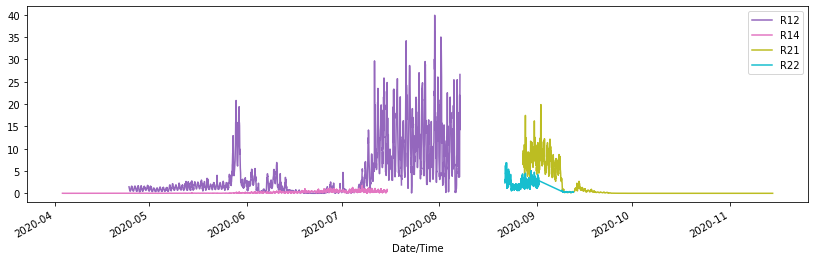

In [11]:
import datetime
fig = plt.figure(figsize=(14, 4))

df4['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C4')
#df8_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'k')
df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C6')
#df1_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'k')
#df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R08', color = 'C0')
#df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C6')
df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R21', color = 'C8')
df9['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R22', color = 'C9')

#plt.ylim(0,2)
#plt.xlim([datetime.date(2020, 1, 1), datetime.date(2020, 4, 30)])
plt.legend()

In [12]:
def define_map():
  fig = plt.figure(figsize=(10, 10))
  ax = plt.axes(projection=ccrs.NorthPolarStereo())
  ax.coastlines(resolution='10m');
  #ax.stock_img()
  ax.gridlines(draw_labels=True, dms=True)
  return fig,ax

class Trajectory(object):
  def __init__(self):
    self.read_trajectory()

  def read_trajectory(self):
    path_traj = '/home/ollie/loziel/nuarctic_temp/nuarctic/data/TRACK/' 
    filename = path_traj + 'Polarstern_daily_track.nc'
    ncid = Dataset(filename, "r", format="NETCDF4")
    self.dates = ncid['dates'][:]
    self.longitude, self.latitude = ncid['longitude'][:], ncid['latitude'][:]
    ncid.close()
    
def create_colorbar_ticks(dates):
    # time limits
    dt0, dt1 = datetime.fromordinal(int(dates[0])), datetime.fromordinal(int(dates[-1]))
    monthi, yeari, monthf, yearf = dt0.month, dt0.year, dt1.month, dt1.year
    monthf = monthf+1
    if monthf>12:
        monthf, yearf = 1, yearf + 1
    # create time axis with value at first of each month
    hybridi, hybridf = yeari*100+monthi, yearf*100+monthf
    strmonth= '0'+str(monthi) if monthi>10 else str(monthi)
    ctick=[datetime.strptime(str(yeari) + strmonth, '%Y%m').toordinal()]
    clabel=[strmonth + '/' + str(yeari)]

    while hybridi<hybridf:
        monthi = monthi + 1
        if monthi>12:
            monthi, yeari = 1, yeari+1
        hybridi=yeari*100+monthi
        strmonth= '0'+str(monthi) if monthi<10 else str(monthi)
        ctick.append(datetime.strptime(str(yeari) + strmonth, '%Y%m').toordinal())
        clabel.append(strmonth + '/' + str(yeari))
    return ctick, clabel

In [13]:
#
# load MOSAiC trajectories
#
trajectory = Trajectory()

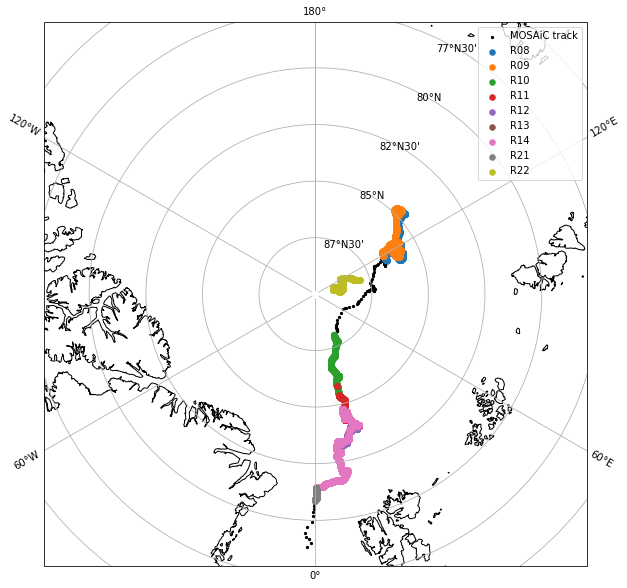

In [14]:
fig,ax = define_map()

plot_extent = [-180, 180, 78, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# topography
#extent_limits = [np.min(topography.longitude), np.max(topography.longitude), np.min(topography.latitude), np.max(topography.latitude)]
#ax.imshow(topography.topography,cmap='Greys_r', extent=extent_limits, transform=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='k', s=5, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='R08')
ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='R09')
ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='R10')
ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='R11')
ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='R12')
ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='R13')
ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='R14')
ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='R21')
ax.scatter(df8['Longitude (deg)'], df8['Latitude (deg)'], c='C8', s=30, transform=ccrs.PlateCarree(), label='R22')

plt.legend()


# measurement point location
#ctick, clabel = create_colorbar_ticks(df.index)
# mplot = ax.scatter(df['Longitude (deg)'], df['Latitude (deg)'], c=df.index, s=200, vmin=ctick[0], vmax=ctick[-1], transform=ccrs.PlateCarree(), cmap='pink_r')
# cbar = fig.colorbar(mplot,extend='both', shrink=0.6,ax=ax, pad=0.1)

# cbar.set_ticks(ctick),cbar.set_ticklabels(clabel),cbar.ax.tick_params(labelsize=16)

#ax.legend()

plt.show()

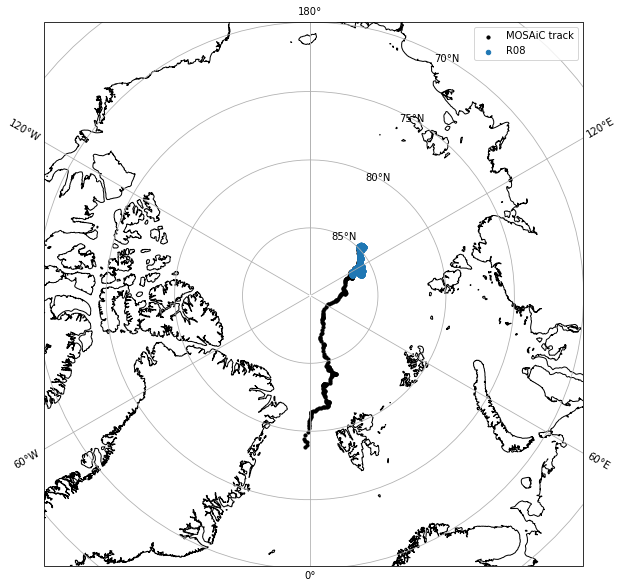

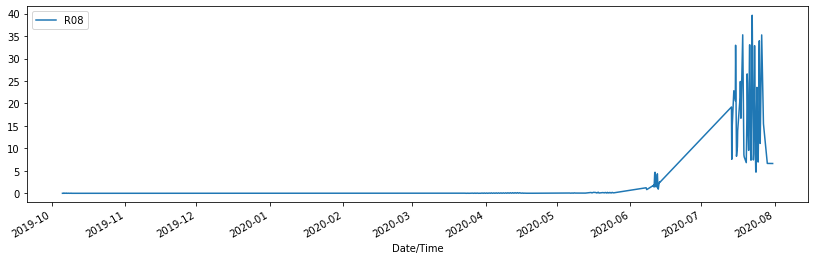

In [15]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='k', s=10, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=20, transform=ccrs.PlateCarree(), label='R08')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))
ax0 = df0['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R08', color = 'C0')
ax0.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

# fig = plt.figure(figsize=(5, 5))
# plt.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c = df0.index)
# plt.colorbar()

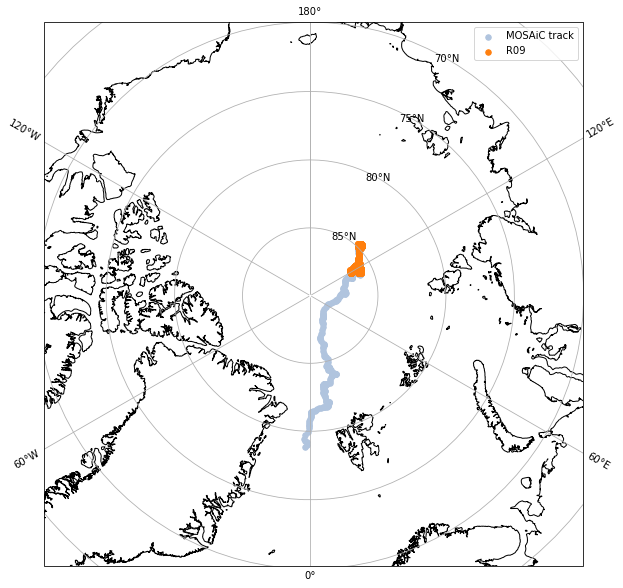

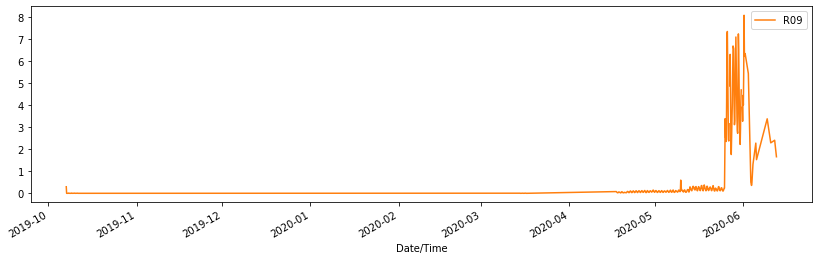

In [16]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='R09')
plt.legend()


fig = plt.figure(figsize=(14, 4))

ax1 = df1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R09', color = 'C1')

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

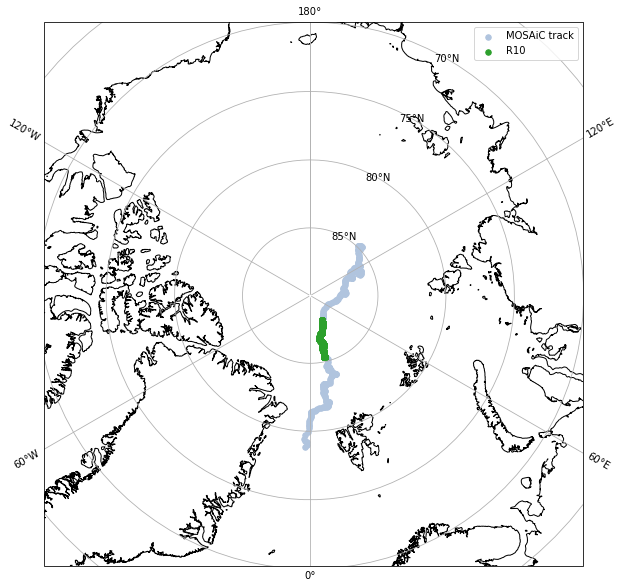

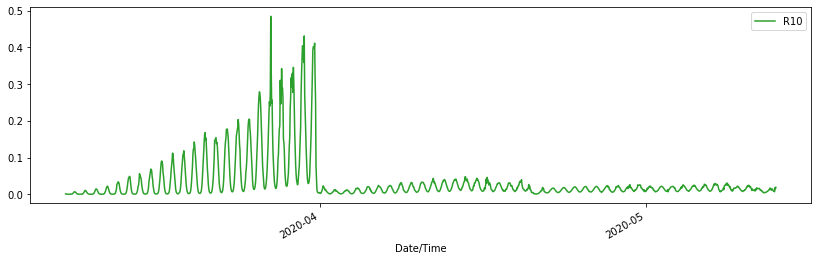

In [17]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='R10')
plt.legend()

fig = plt.figure(figsize=(14, 4))
ax2 = df2['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R10', color = 'C2')

ax2.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

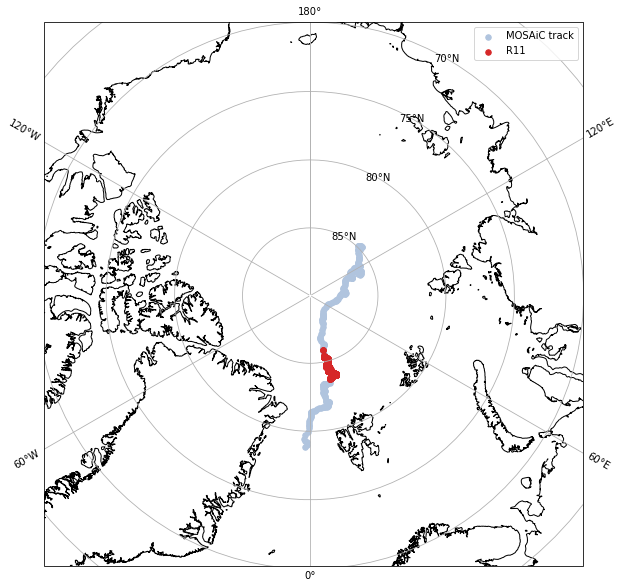

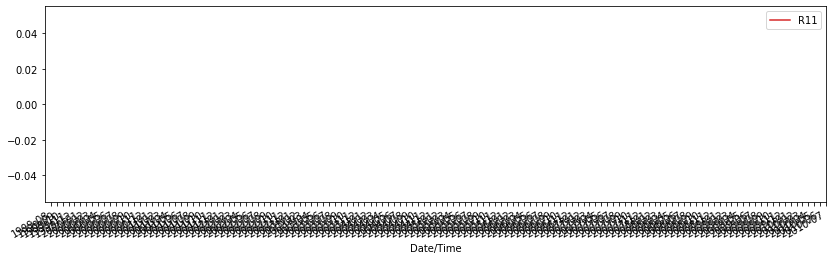

In [18]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
# ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='df0')
# ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='df1')
# ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='df2')
ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='R11')
plt.legend()

fig = plt.figure(figsize=(14, 4))

ax3 = df3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R11', color = 'C3')

ax3.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

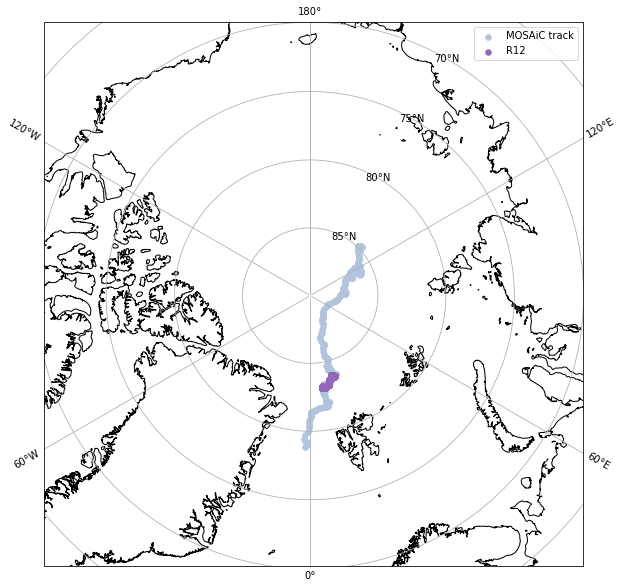

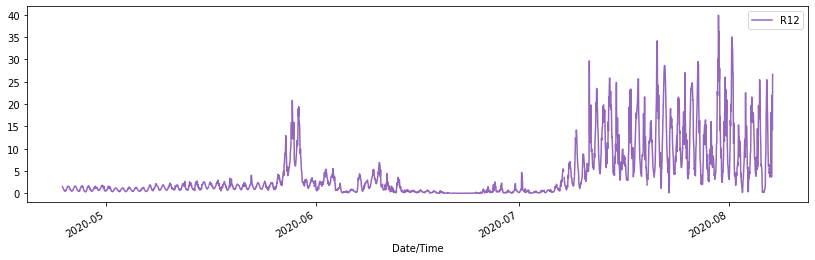

In [19]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='R12')
plt.legend()


fig = plt.figure(figsize=(14, 4))

ax4 = df4['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R12', color = 'C4')

ax4.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

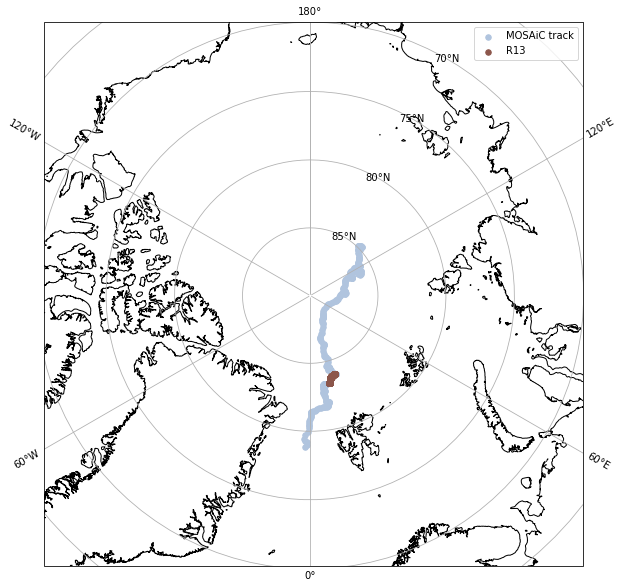

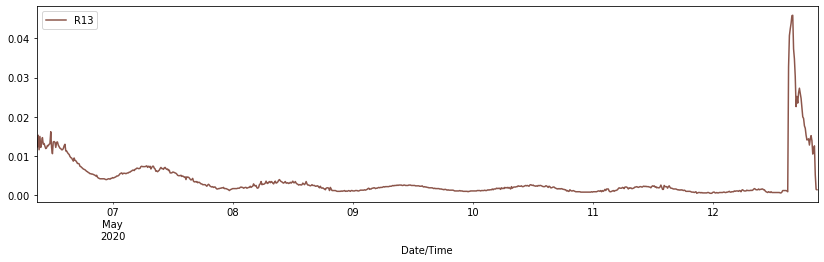

In [20]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='R13')

plt.legend()

fig = plt.figure(figsize=(14, 4))
ax5 = df5['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R13', color = 'C5')

ax5.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

plt.legend()
plt.show()

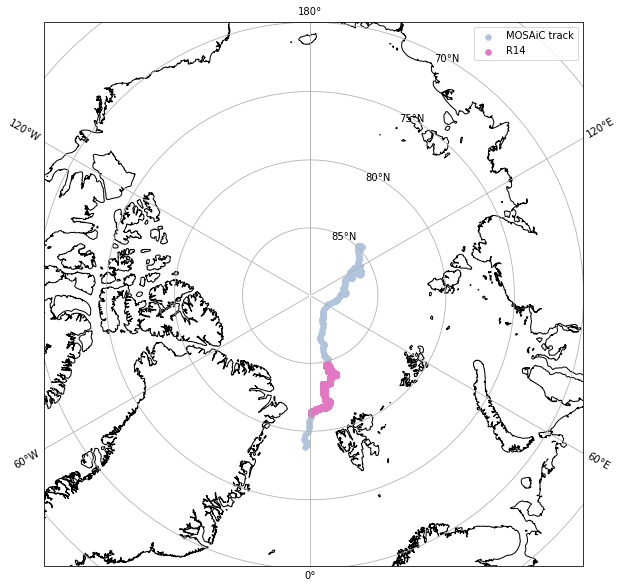

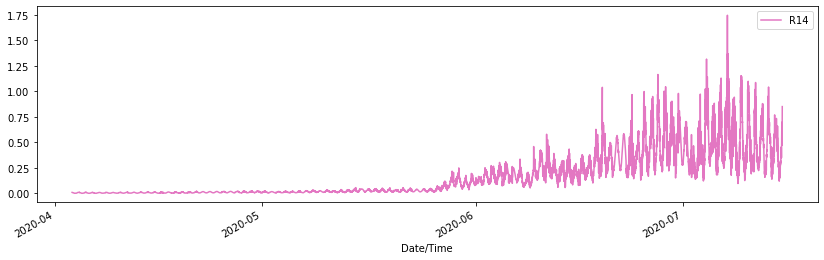

In [21]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks

ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='R14')



plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax6 = df6['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R14', color = 'C6')

ax6.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

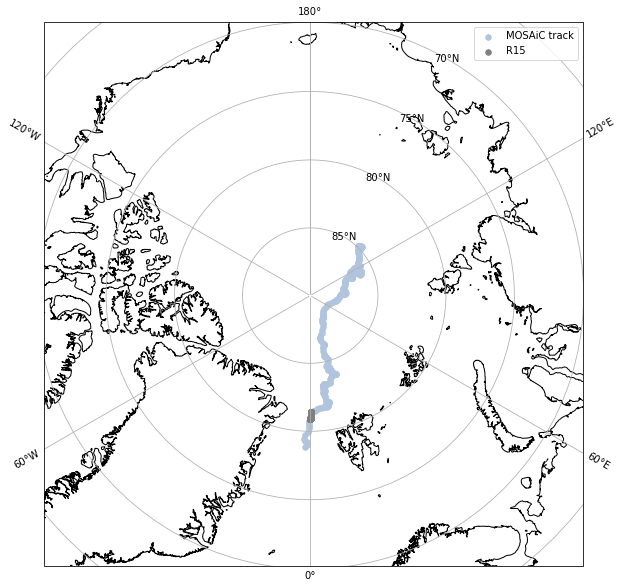

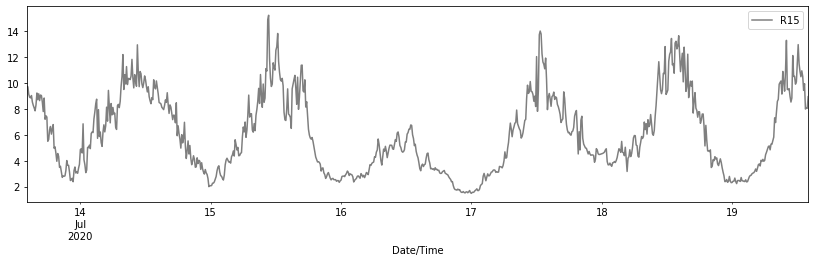

In [22]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks

ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='R15')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax7 = df7['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R15', color = 'C7')

ax7.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

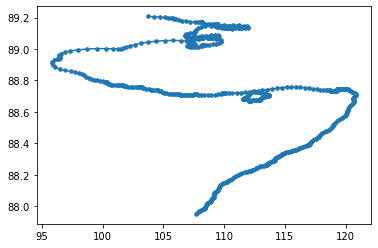

In [23]:
plt.plot(df8['Longitude (deg)'], df8['Latitude (deg)'],'.-')

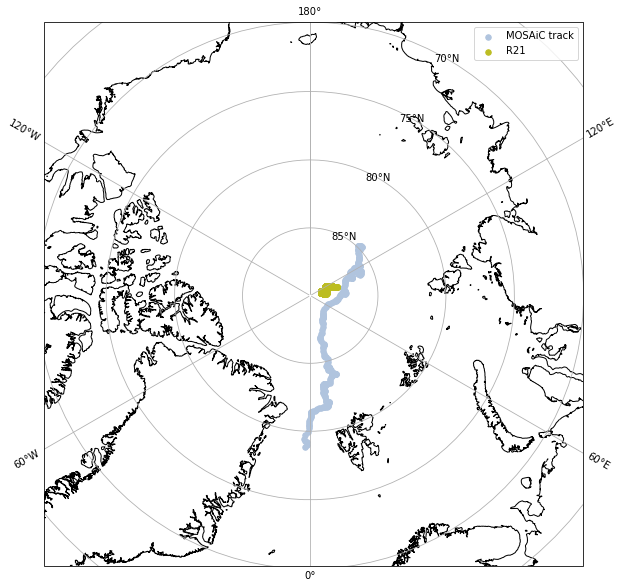

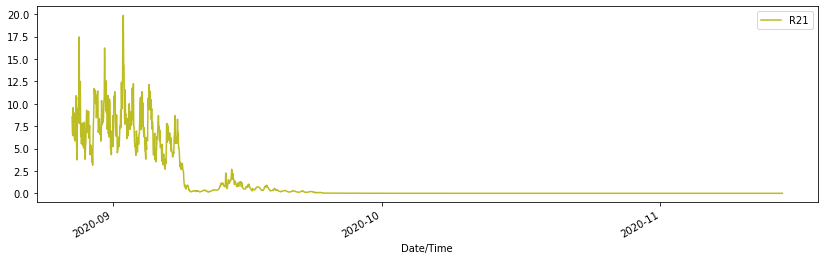

In [24]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
# ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='df0')
# ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='df1')
# ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='df2')
# ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='df3')
# ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='df4')
# ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='df5')
# ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='df6')
# ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='df7')
ax.scatter(df8['Longitude (deg)'], df8['Latitude (deg)'], c='C8', s=30, transform=ccrs.PlateCarree(), label='R21')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax8 = df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R21', color = 'C8')

ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

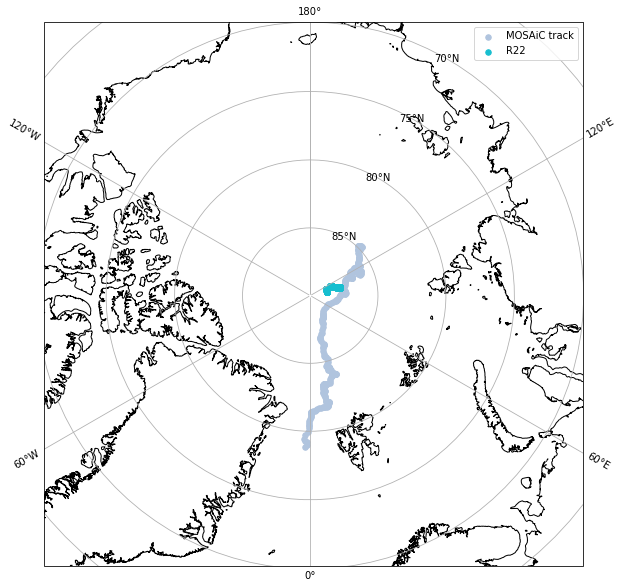

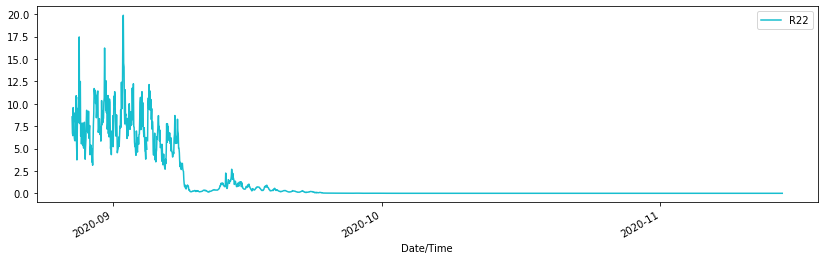

In [25]:
fig,ax = define_map()

plot_extent = [-180, 180, 70, 90]
ax.set_extent(plot_extent, crs=ccrs.PlateCarree())

# MOSAiC track
ax.scatter(trajectory.longitude, trajectory.latitude, c='lightsteelblue', s=30, transform=ccrs.PlateCarree(), label='MOSAiC track')

# ITPs tracks
# ax.scatter(df0['Longitude (deg)'], df0['Latitude (deg)'], c='C0', s=30, transform=ccrs.PlateCarree(), label='df0')
# ax.scatter(df1['Longitude (deg)'], df1['Latitude (deg)'], c='C1', s=30, transform=ccrs.PlateCarree(), label='df1')
# ax.scatter(df2['Longitude (deg)'], df2['Latitude (deg)'], c='C2', s=30, transform=ccrs.PlateCarree(), label='df2')
# ax.scatter(df3['Longitude (deg)'], df3['Latitude (deg)'], c='C3', s=30, transform=ccrs.PlateCarree(), label='df3')
# ax.scatter(df4['Longitude (deg)'], df4['Latitude (deg)'], c='C4', s=30, transform=ccrs.PlateCarree(), label='df4')
# ax.scatter(df5['Longitude (deg)'], df5['Latitude (deg)'], c='C5', s=30, transform=ccrs.PlateCarree(), label='df5')
# ax.scatter(df6['Longitude (deg)'], df6['Latitude (deg)'], c='C6', s=30, transform=ccrs.PlateCarree(), label='df6')
# ax.scatter(df7['Longitude (deg)'], df7['Latitude (deg)'], c='C7', s=30, transform=ccrs.PlateCarree(), label='df7')
ax.scatter(df9['Longitude (deg)'], df9['Latitude (deg)'], c='C9', s=30, transform=ccrs.PlateCarree(), label='R22')

plt.legend()
plt.show()

fig = plt.figure(figsize=(14, 4))

ax8 = df8['photosythetically active (PAR) irradiance downward (W/m**2)'].plot(label = 'R22', color = 'C9')

ax8.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.gcf().autofmt_xdate()

plt.legend()

# Create final dataframe

Bridging R8, R14, R12

In [26]:
df0_resampled = df0.resample('30Min').mean()
df0_resampled = df0_resampled.interpolate()
# df0_resampled

In [27]:
df4_resampled = df4.resample('30Min').mean()
df4_resampled = df4_resampled.interpolate()
# df4_resampled

In [28]:
df6_resampled = df6.resample('30Min').mean()
df6_resampled = df6_resampled.interpolate()
# df6_resampled

In [29]:
df8_resampled = df8.resample('30Min').mean()
df8_resampled = df8_resampled.interpolate()
# df8_resampled

In [30]:
df = pd.DataFrame(columns = ['PAR'])
dates = pd.date_range('2019-11-1', freq="30Min", periods= 17568)
df['time'] = dates
df.set_index('time', inplace= True)
# df

In [31]:
print(df.dtypes)
for col in df:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df.dtypes)

PAR    object
dtype: object
PAR    float64
dtype: object


In [32]:
df0_resampled = df0_resampled.loc['2019-11-01 00:00:00':'2020-03-16 23:30:00']
df6_resampled = df6_resampled.loc['2020-04-03 11:30:00':'2020-07-05 23:30:00'] # '2020-06-11 23:30:00'
df4_resampled = df4_resampled.loc['2020-07-06 00:00:00':'2020-08-07 12:00:00']
df8_resampled = df8_resampled.loc['2020-08-27 11:00:00':'2020-11-14 15:00:00']

In [33]:
# df0_resampled

In [34]:
# df6_resampled

In [35]:
# df4_resampled

In [36]:
# df8_resampled

In [37]:
df['PAR'].loc['2019-11-01 00:00:00':'2020-03-16 23:30:00'] = df0_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2019-11-01 00:00:00':'2020-03-16 23:30:00']
df['PAR'].loc['2020-04-03 11:30:00':'2020-07-05 23:30:00'] = df6_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-04-03 11:30:00':'2020-07-05 23:30:00']
df['PAR'].loc['2020-07-06 00:00:00':'2020-08-07 12:00:00'] = df4_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-07-06 00:00:00':'2020-08-07 12:00:00']
df['PAR'].loc['2020-08-27 11:00:00':'2020-11-14 15:00:00'] = df8_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-08-27 11:00:00':'2020-11-14 15:00:00']

<AxesSubplot:xlabel='time'>

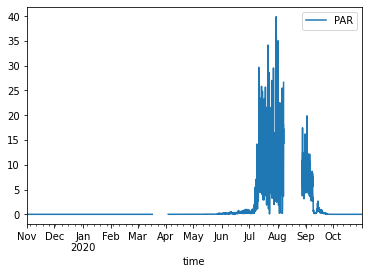

In [38]:
df.plot()

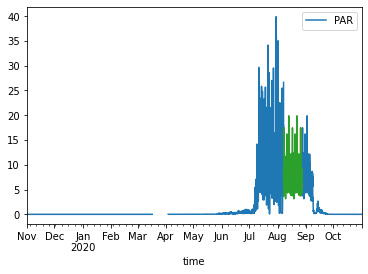

In [39]:
plt.close()

df.plot()

df_temp1 = df8_resampled.loc['2020-08-27 12:30:00':'2020-09-05 10:30:00'].copy()
#df_temp1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()


df_temp1.index = pd.date_range('2020-08-07 12:30:00', freq="30Min", periods= 429)
#df_temp1['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()


df_temp2 = df8_resampled.loc['2020-08-27 12:30:00':'2020-09-05 10:40:00'].copy()
df_temp2.index = pd.date_range('2020-08-16 12:30:00', freq="30Min", periods= 429)
#df_temp2['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()


df_temp3 = df8_resampled.loc['2020-08-27 12:30:00':'2020-08-29 12:00:00'].copy()
#df_temp3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()
df_temp3.index = pd.date_range('2020-08-25 11:00:00', freq="30Min", periods= 96)
df_temp3['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()

df_temp = pd.concat([df_temp1, df_temp2, df_temp3])
df_temp['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()
#df_temp['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()

plt.show()

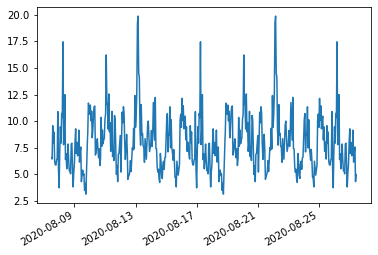

In [40]:
plt.close('all')
df_temp['photosythetically active (PAR) irradiance downward (W/m**2)'].plot()
plt.show()

<AxesSubplot:xlabel='time'>

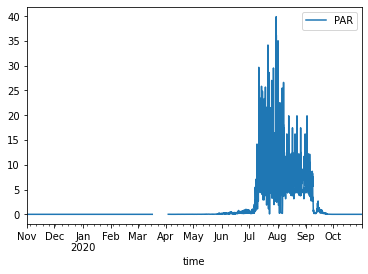

In [41]:
plt.close()
df['PAR'].loc['2020-08-07 12:30:00':'2020-08-29 12:00:00'] = df_temp['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-08-07 12:30:00':'2020-08-29 12:00:00']
df.plot()


In [42]:
df_temp = df.loc['2020-03-16'].copy()

df_temp.index = pd.date_range('2020-03-17', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-17'] = df_temp['PAR'].loc['2020-03-17']

df_temp.index = pd.date_range('2020-03-18', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-18'] = df_temp['PAR'].loc['2020-03-18']

df_temp.index = pd.date_range('2020-03-19', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-19'] = df_temp['PAR'].loc['2020-03-19']

df_temp.index = pd.date_range('2020-03-20', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-20'] = df_temp['PAR'].loc['2020-03-20']

df_temp.index = pd.date_range('2020-03-21', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-21'] = df_temp['PAR'].loc['2020-03-21']

df_temp.index = pd.date_range('2020-03-22', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-22'] = df_temp['PAR'].loc['2020-03-22']

df_temp.index = pd.date_range('2020-03-23', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-23'] = df_temp['PAR'].loc['2020-03-23']

df_temp.index = pd.date_range('2020-03-24', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-24'] = df_temp['PAR'].loc['2020-03-24']

df_temp.index = pd.date_range('2020-03-25', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-25'] = df_temp['PAR'].loc['2020-03-25']

df_temp.index = pd.date_range('2020-03-26', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-26'] = df_temp['PAR'].loc['2020-03-26']

df_temp.index = pd.date_range('2020-03-27', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-27'] = df_temp['PAR'].loc['2020-03-27']

df_temp.index = pd.date_range('2020-03-28', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-28'] = df_temp['PAR'].loc['2020-03-28']

df_temp.index = pd.date_range('2020-03-29', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-29'] = df_temp['PAR'].loc['2020-03-29']

df_temp.index = pd.date_range('2020-03-30', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-30'] = df_temp['PAR'].loc['2020-03-30']

df_temp.index = pd.date_range('2020-03-31', freq="30Min", periods= 48)
df['PAR'].loc['2020-03-31'] = df_temp['PAR'].loc['2020-03-31']

df_temp.index = pd.date_range('2020-04-01', freq="30Min", periods= 48)
df['PAR'].loc['2020-04-01'] = df_temp['PAR'].loc['2020-04-01']

df_temp.index = pd.date_range('2020-04-02', freq="30Min", periods= 48)
df['PAR'].loc['2020-04-02'] = df_temp['PAR'].loc['2020-04-02']

<AxesSubplot:xlabel='time'>

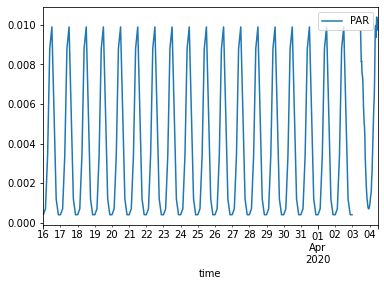

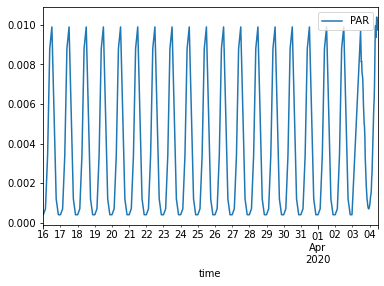

In [43]:
df.loc['2020-03-15 23:30:00':'2020-04-04 11:30:00'].plot()
df_interp = df.interpolate()
df_interp.loc['2020-03-15 23:30:00':'2020-04-04 11:30:00'].plot()

<AxesSubplot:xlabel='time'>

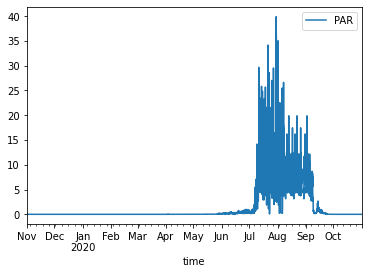

In [44]:
df.plot()

In [45]:
df['PAR'].loc['2020-08-27 11:00:00':'2020-11-14 15:00:00'] = df8_resampled['photosythetically active (PAR) irradiance downward (W/m**2)'].loc['2020-08-27 11:00:00':'2020-11-14 15:00:00']

<AxesSubplot:xlabel='time'>

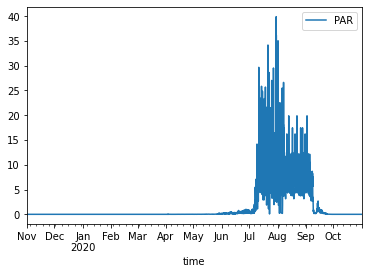

In [46]:
df.plot()

In [47]:
#df_interp.to_csv('PAR_forcing.csv')

In [49]:
df = df.to_xarray()

In [57]:
df.to_netcdf('../../data/ITP_PAR/PAR_forcing_v2.nc')

In [51]:
df

<xarray.Dataset>
Dimensions:  (time: 17568)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2020-10-31T23:30:00
Data variables:
    PAR      (time) float64 0.0003 0.0003 0.0003 ... 0.0005 0.0005 0.00045

In [3]:
df2 = xr.open_dataset('../../data/ITP_PAR/PAR_forcing_v2.nc')

#datetimeindex = df2.indexes['time'].to_datetimeindex()

In [4]:
df2

<xarray.Dataset>
Dimensions:  (time: 17568)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2020-10-31T23:30:00
Data variables:
    PAR      (time) float64 ...

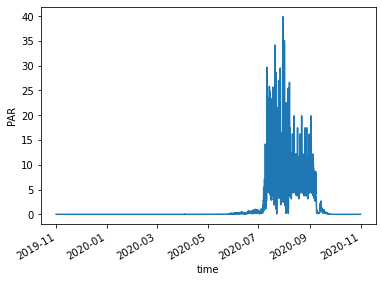

In [5]:
df2['PAR'].plot()

In [1]:
ncid = Dataset('../../data/ITP_PAR/PAR_forcing_v2.nc', "r", format="NETCDF4")
        
time = ncid.variables['time']
par = ncid.variables['PAR']

NameError: name 'Dataset' is not defined

In [122]:
time[1]

masked_array(data=30,
             mask=False,
       fill_value=999999)

In [107]:
ncid

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): time(17568)
    variables(dimensions): int64 time(time), float64 PAR(time)
    groups: 

In [120]:
datetime.strptime(str(time[0]),'%Y-%m-%d %H:%M:%S')

ValueError: time data '0' does not match format '%Y-%m-%d %H:%M:%S'

In [68]:
from datetime import datetime
from datetime import date

date_ref = datetime.strptime('2019-11-01','%Y-%m-%d').toordinal()

In [69]:
date_ref + 30/60

719163.5

In [80]:
datetime.strptime('2019-11-01','%Y-%m-%d') + datetime.datetime(0, 0, 0, 0, time[1].data)

AttributeError: type object 'datetime.datetime' has no attribute 'datetime'

In [83]:
datetime(0, 0, 0, 0, 1)

ValueError: year 0 is out of range

In [87]:
datetime.fromordinal(int(1))

datetime.datetime(1, 1, 1, 0, 0)

In [90]:
from datetime import timedelta
time = date_ref + timedelta(minutes=time)

TypeError: unsupported type for timedelta minutes component: netCDF4._netCDF4.Variable

In [111]:
import netCDF4
time_var = ncid.variables['time'][:]
dtime = netCDF4.num2date(time_var[:],ncid['time'].units)

In [123]:
len(dtime.data)

17568

In [124]:
dtime.data

array([cftime.DatetimeGregorian(2019, 11, 1, 0, 0, 0, 0),
       cftime.DatetimeGregorian(2019, 11, 1, 0, 30, 0, 0),
       cftime.DatetimeGregorian(2019, 11, 1, 1, 0, 0, 0), ...,
       cftime.DatetimeGregorian(2020, 10, 31, 22, 30, 0, 0),
       cftime.DatetimeGregorian(2020, 10, 31, 23, 0, 0, 0),
       cftime.DatetimeGregorian(2020, 10, 31, 23, 30, 0, 0)], dtype=object)

In [125]:
1/24

0.041666666666666664